<a href="https://colab.research.google.com/github/gdafonso/TFM/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instala la librería de Imbalanced Learn desde linea de comando

In [ ]:
#pip install -U imbalanced-learn

Análisis exploratorio, para comprobar el desequilibrio entre las clases

Importar bibliotecas necesarias

In [ ]:
import pandas as pd  # Pandas se utiliza para manipular y analizar datos en formato tabular.
import numpy as np   # NumPy proporciona soporte para matrices y operaciones matemáticas eficientes.
import matplotlib.pyplot as plt  # Matplotlib se utiliza para trazar gráficos y visualizar datos.
import seaborn as sns  # Seaborn se utiliza para crear visualizaciones más atractivas y eficientes.

from sklearn.metrics import confusion_matrix  # De scikit-learn, se utiliza para calcular la matriz de confusión.
from sklearn.metrics import classification_report  # También de scikit-learn, se utiliza para generar un informe de clasificación.
from sklearn.model_selection import train_test_split  # Para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.linear_model import LogisticRegression  # Para ajustar un modelo de regresión logística.
from sklearn.decomposition import PCA  # Para realizar análisis de componentes principales (PCA).
from sklearn.tree import DecisionTreeClassifier  # Para ajustar un modelo de árbol de decisión.

from pylab import rcParams  # Se utiliza para configurar parámetros de gráficos específicos.

from imblearn.under_sampling import NearMiss  # De la biblioteca imbalanced-learn, se utiliza para submuestrear datos desequilibrados.
from imblearn.over_sampling import RandomOverSampler  # Para sobremuestrear datos desequilibrados.
from imblearn.combine import SMOTETomek  # Para aplicar la técnica SMOTE-Tomek a datos desequilibrados.
from imblearn.ensemble import BalancedBaggingClassifier  # Para aplicar técnicas de balanceo mediante ensamblaje.

from collections import Counter  # Utilizado para contar elementos en una secuencia (como una lista) y analizar el desequilibrio de clases.

Cada biblioteca importada cumple un propósito específico en el análisis y modelado de datos, y se utilizan en el código para diversas tareas como manipulación de datos, visualización, clasificación, balanceo de clases y métricas de evaluación de modelos.

Luego de importar las librerías que usaremos, cargamos con pandas el dataframe

In [ ]:
# Importa la biblioteca de Google Colab para montar Google Drive
from google.colab import drive
# Monta el sistema de archivos de Google Drive en Colab
drive.mount('/content/drive')

# Lista de rutas de archivos CSV
file_paths = [
    "/content/drive/MyDrive/TFM/Consumos_1.csv",
    "/content/drive/MyDrive/TFM/Consumos_2.csv",
]

# Concatena los datos de los archivos CSV en un solo DataFrame
df_consumos = pd.concat([pd.read_csv(file, sep=';') for file in file_paths])

# Convierte las columnas 'fecha_lectura_anterior' y 'fecha_lectura' en objetos de fecha y hora,
# configurando 'dayfirst' para tratar el día como el primer componente de la fecha
df_consumos['fecha_lectura_anterior'] = pd.to_datetime(df_consumos['fecha_lectura_anterior'], errors='coerce', dayfirst=True)
df_consumos['fecha_lectura'] = pd.to_datetime(df_consumos['fecha_lectura'], errors='coerce', dayfirst=True)

# Calcula la diferencia en días entre 'fecha_lectura' y 'fecha_lectura_anterior' y la almacena en 'dias_de_lectura'
df_consumos['dias_de_lectura'] = df_consumos['fecha_lectura'] - df_consumos['fecha_lectura_anterior']

# Calcula la columna 'media_de_consumo' dividiendo 'v_consumo' por 'dias_de_lectura' en días
df_consumos['media_de_consumo'] = df_consumos['v_consumo'].str.replace(".", "").astype(int) / df_consumos['dias_de_lectura'].dt.days

# Define una lista de nombres de columnas a eliminar del DataFrame
columnas_a_eliminar = ["dia_lectura", "anyo_lectura", "mes_lectura", "fecha_lectura_anterior", "v_consumo", "v_lectura", "v_lectura_anterior", "dias_de_lectura"]

# Elimina las columnas especificadas del DataFrame
df_consumos = df_consumos.drop(columnas_a_eliminar, axis=1)

# Convierte la columna 'fecha_lectura' al formato 'mm/YYYY'
df_consumos['fecha_lectura'] = df_consumos['fecha_lectura'].dt.strftime('%m/%Y')

# Define una lista de integradores no deseados
integradores_no_deseados = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

# Filtra las filas donde la columna 'integrador' no está en la lista de integradores no deseados
df_consumos = df_consumos[~df_consumos['integrador'].isin(integradores_no_deseados)]

# Agrupa el DataFrame por 'cups', 'fecha_lectura', y 'integrador' y calcula la media de 'media_de_consumo'
df_consumos = df_consumos.groupby(['cups', 'fecha_lectura', 'integrador']).agg(media_de_consumo=('media_de_consumo', 'mean'))

# Filtra las filas donde 'media_de_consumo' no es igual a 0
df_consumos = df_consumos[df_consumos.media_de_consumo != 0]

# Realiza un desapilamiento de las columnas de índice múltiple en el DataFrame
df_consumos = df_consumos.unstack()

# Renombra las columnas con un formato específico
df_consumos.columns = [f"{a}{' integrador '}{b}" for a, b in df_consumos.columns]

# Rellena los valores faltantes con 0
df_consumos = df_consumos.fillna(0)

# Calcula la columna 'Media de consumo' como la suma de las columnas 'media_de_consumo integrador 1', 'media_de_consumo integrador 2', y 'media_de_consumo integrador 3'
df_consumos['Media de consumo'] = df_consumos['media_de_consumo integrador 1'] + df_consumos['media_de_consumo integrador 2'] + df_consumos['media_de_consumo integrador 3']

# Elimina las columnas 'media_de_consumo integrador 1', 'media_de_consumo integrador 2', y 'media_de_consumo integrador 3'
df_consumos = df_consumos.drop(["media_de_consumo integrador 1", "media_de_consumo integrador 2", "media_de_consumo integrador 3"], axis=1)



Mounted at /content/drive


<ipython-input-3-bd4bfde444ad>:13: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_consumos = pd.concat([pd.read_csv(file, sep=';') for file in file_paths])
<ipython-input-3-bd4bfde444ad>:24: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_consumos['media_de_consumo'] = df_consumos['v_consumo'].str.replace(".", "").astype(int) / df_consumos['dias_de_lectura'].dt.days


Estos comentarios explican las operaciones realizadas en cada parte del código y su propósito.

In [ ]:
# Lee un archivo CSV llamado "CUPS.csv" y lo carga en un DataFrame df_cups, utilizando ";" como separador
df_cups = pd.read_csv("/content/drive/MyDrive/TFM/CUPS.csv", sep=';')

# Reinicia el índice del DataFrame df_consumos
df_consumos = df_consumos.reset_index()

# Establece la columna 'cups' como el índice del DataFrame df_consumos
df_consumos = df_consumos.set_index('cups')

# Pivota el primer DataFrame para que las fechas se conviertan en columnas
df_consumos = df_consumos.pivot(columns='fecha_lectura', values='Media de consumo')

df_consumos.head()

fecha_lectura,01/2016,01/2017,01/2018,01/2019,01/2020,02/2016,02/2017,02/2018,02/2019,02/2020,...,10/2020,11/2016,11/2017,11/2018,11/2019,11/2020,12/2016,12/2017,12/2018,12/2019
cups,,,,,,,,,,,,,,,,,,,,,
ES0031101457553001TW0F,NaN,1.644500e+06,1.520467e+06,6.545000e+05,7.141000e+05,NaN,2.069519e+06,1.521684e+06,7.537407e+05,6.508571e+05,...,NaN,2.115241e+06,1.554310e+06,2.728621e+05,1.896897e+05,NaN,2.270400e+06,1.420633e+06,512633.333333,9.209333e+05
ES0031101462487001TL0F,NaN,2.106367e+06,2.645228e+06,1.842900e+06,1.642400e+06,NaN,2.051963e+06,2.112630e+06,2.125481e+06,1.618357e+06,...,851766.666667,2.244000e+06,2.817931e+06,2.090833e+06,1.506552e+06,NaN,9.615000e+05,1.766867e+06,963833.333333,1.243167e+06
ES0031102812477001TM0F,354.838710,3.437500e+02,3.437500e+02,2.121212e+02,2.352941e+02,296.296296,3.214286e+02,3.333333e+02,2.248563e+02,2.068966e+02,...,187.500000,3.103448e+02,3.333333e+02,2.195122e+02,2.162162e+02,214.285714,3.548387e+02,3.793103e+02,233.333333,2.068966e+02
ES0031102812477002TY0F,NaN,2.000000e+03,1.656250e+03,2.266667e+03,2.310345e+03,NaN,1.892857e+03,1.633333e+03,2.172414e+03,2.482759e+03,...,2939.393939,2.035714e+03,1.818182e+03,1.882353e+03,3.004113e+03,NaN,2.096774e+03,1.344828e+03,8200.000000,2.333333e+03
ES0031102812477003TF0F,1806.451613,1.781250e+03,1.078125e+04,7.100000e+03,5.264706e+03,3703.703704,3.392857e+03,8.133333e+03,8.413793e+03,7.655172e+03,...,3312.500000,1.517241e+03,5.484848e+03,6.882353e+03,5.891892e+03,4321.428571,1.935484e+03,8.724138e+03,8066.666667,5.275862e+03


Estos comentarios explican cada paso del código, desde la lectura del archivo CSV y la creación de DataFrames hasta la manipulación de los índices y la asignación de valores nulos en las columnas de 'df_datos'.

In [ ]:
df_fraudes = pd.read_csv("/content/drive/MyDrive/TFM/Fraudes.csv", sep=';')

df_consumos = df_consumos.assign(Class=df_consumos.index.isin(df_fraudes.CUPS).astype(int))

# Write the DataFrame to CSV file.
with open('/content/drive/MyDrive/TFM/datos.csv', 'w') as f:
  df_consumos.to_csv(f)


#df_vups = pd.read_csv("/content/drive/MyDrive/TFM/VUPS.csv", sep=';')
#df_integradores = pd.read_csv("/content/drive/MyDrive/TFM/Integradores.csv", sep=';')
#df_cnae = pd.read_csv("/content/drive/MyDrive/TFM/CNAE.csv", sep=';')

Definimos la función para rellenar las lecturas vacías

In [ ]:
def rellenar_lecturas_vacias(dataframe):
    # Iterar sobre cada fila (punto de lectura)
    for indice, fila in dataframe.iterrows():
        # Iterar sobre cada columna (mes)
        for columna in dataframe.columns:
            # Verificar si el valor es NaN (lectura vacía)
            if pd.isna(fila[columna]):
                # Calcular la media de los meses adyacentes si están disponibles
                posicion_columna = dataframe.columns.get_loc(columna)
                if posicion_columna > 0 and not pd.isna(fila[dataframe.columns[posicion_columna - 1]]):
                    valor_anterior = fila[dataframe.columns[posicion_columna - 1]]
                else:
                    valor_anterior = 0  # Puedes ajustar esto según tus necesidades

                if posicion_columna < len(dataframe.columns) - 1 and not pd.isna(fila[dataframe.columns[posicion_columna + 1]]):
                    valor_siguiente = fila[dataframe.columns[posicion_columna + 1]]
                else:
                    valor_siguiente = 0  # Puedes ajustar esto según tus necesidades

                # Calcular la media y asignar el valor
                media = (valor_anterior + valor_siguiente) / 2
                dataframe.at[indice, columna] = media

    return dataframe

Contamos los NaN antes de aplicar la función de relleno

In [ ]:
count_nan = df_consumos.isna().sum().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 174949


Rellenamos los NaN y volvemos a contar

In [ ]:
dataframe_relleno = rellenar_lecturas_vacias(df_consumos)

count_nan = dataframe_relleno.isna().sum().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 0


Actualizamos el dataframe y lo mostramos



In [ ]:
df_consumos = dataframe_relleno
print('Updated Dataframe:')
df_consumos.head()

Updated Dataframe:


fecha_lectura,01/2016,01/2017,01/2018,01/2019,01/2020,02/2016,02/2017,02/2018,02/2019,02/2020,...,11/2016,11/2017,11/2018,11/2019,11/2020,12/2016,12/2017,12/2018,12/2019,Class
cups,,,,,,,,,,,,,,,,,,,,,
ES0031101457553001TW0F,8.222500e+05,1.644500e+06,1.520467e+06,6.545000e+05,7.141000e+05,1.391809e+06,2.069519e+06,1.521684e+06,7.537407e+05,6.508571e+05,...,2.115241e+06,1.554310e+06,2.728621e+05,1.896897e+05,1.230045e+06,2.270400e+06,1.420633e+06,512633.333333,9.209333e+05,0
ES0031101462487001TL0F,1.053183e+06,2.106367e+06,2.645228e+06,1.842900e+06,1.642400e+06,1.847181e+06,2.051963e+06,2.112630e+06,2.125481e+06,1.618357e+06,...,2.244000e+06,2.817931e+06,2.090833e+06,1.506552e+06,1.234026e+06,9.615000e+05,1.766867e+06,963833.333333,1.243167e+06,0
ES0031102812477001TM0F,3.548387e+02,3.437500e+02,3.437500e+02,2.121212e+02,2.352941e+02,2.962963e+02,3.214286e+02,3.333333e+02,2.248563e+02,2.068966e+02,...,3.103448e+02,3.333333e+02,2.195122e+02,2.162162e+02,2.142857e+02,3.548387e+02,3.793103e+02,233.333333,2.068966e+02,0
ES0031102812477002TY0F,1.000000e+03,2.000000e+03,1.656250e+03,2.266667e+03,2.310345e+03,2.101601e+03,1.892857e+03,1.633333e+03,2.172414e+03,2.482759e+03,...,2.035714e+03,1.818182e+03,1.882353e+03,3.004113e+03,2.550444e+03,2.096774e+03,1.344828e+03,8200.000000,2.333333e+03,0
ES0031102812477003TF0F,1.806452e+03,1.781250e+03,1.078125e+04,7.100000e+03,5.264706e+03,3.703704e+03,3.392857e+03,8.133333e+03,8.413793e+03,7.655172e+03,...,1.517241e+03,5.484848e+03,6.882353e+03,5.891892e+03,4.321429e+03,1.935484e+03,8.724138e+03,8066.666667,5.275862e+03,0


Veamos de cuantas filas tenemos y cuantas hay de cada clase:

In [ ]:
print(df_consumos.shape)
print(pd.value_counts(df_consumos['Class'], sort = True))

(20014, 60)
0    19885
1      129
Name: Class, dtype: int64


Vemos que son 20.014 filas y solamente 129 son la clase minoritaria con los casos de fraude. Representan el 0,645% de las muestras.

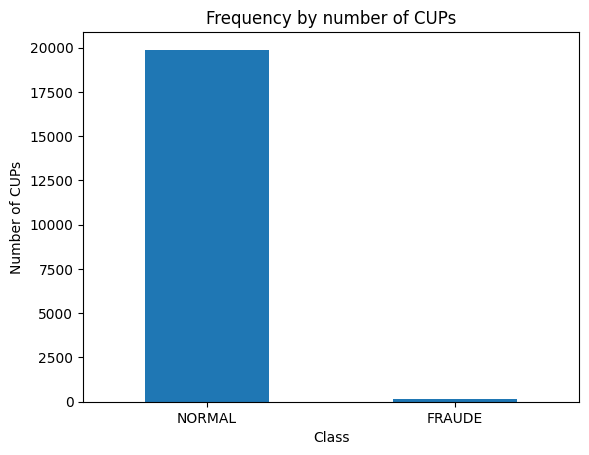

In [ ]:
count_classes = pd.value_counts(df_consumos['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS = ["NORMAL","FRAUDE"]
plt.xticks(range(2), LABELS)
plt.title("Frequency by number of CUPs")
plt.xlabel("Class")
plt.ylabel("Number of CUPs");

Creamos los sets de entrenamiento y test y la funció para mostrar los resultados

In [ ]:
#definimos nuestras etiquetas y features
y = df_consumos['Class']
X = df_consumos.drop('Class', axis=1)

#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Probando el Modelo “a secas” -sin estrategias-

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


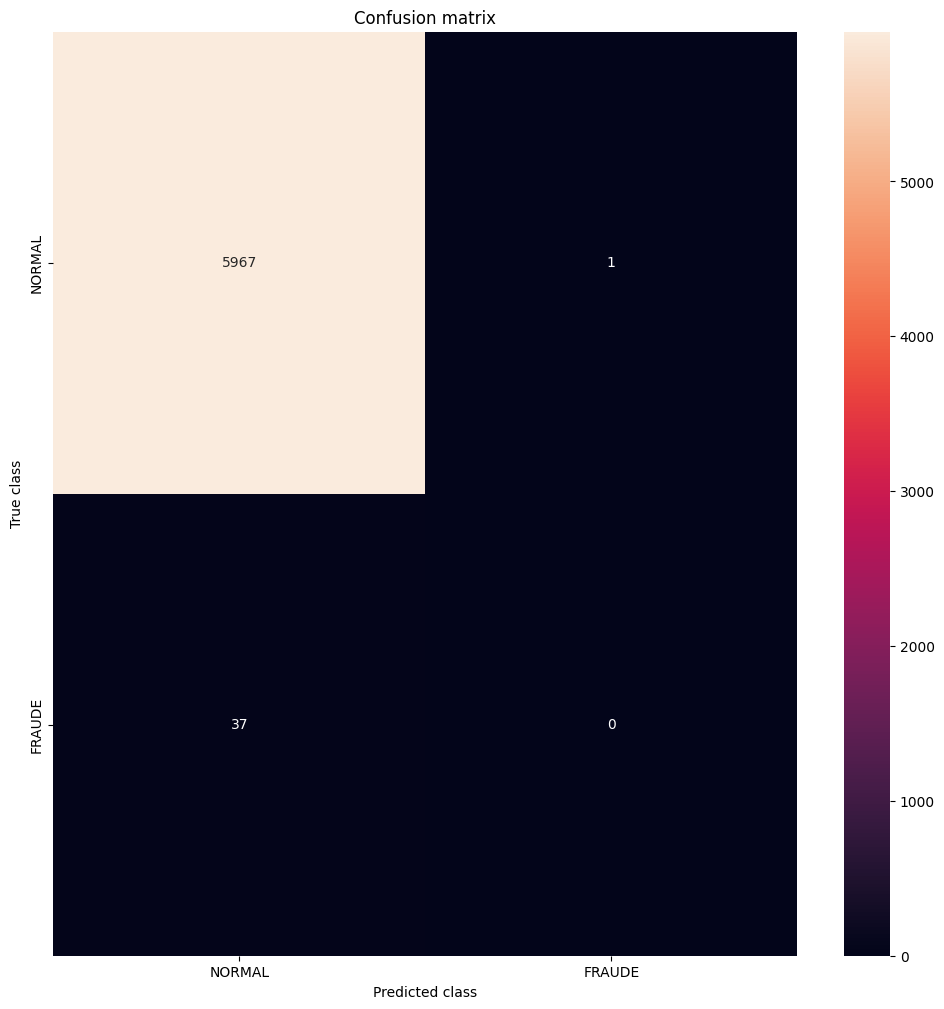

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5968
           1       0.00      0.00      0.00        37

    accuracy                           0.99      6005
   macro avg       0.50      0.50      0.50      6005
weighted avg       0.99      0.99      0.99      6005



In [ ]:
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Estrategia: Penalización para compensar

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


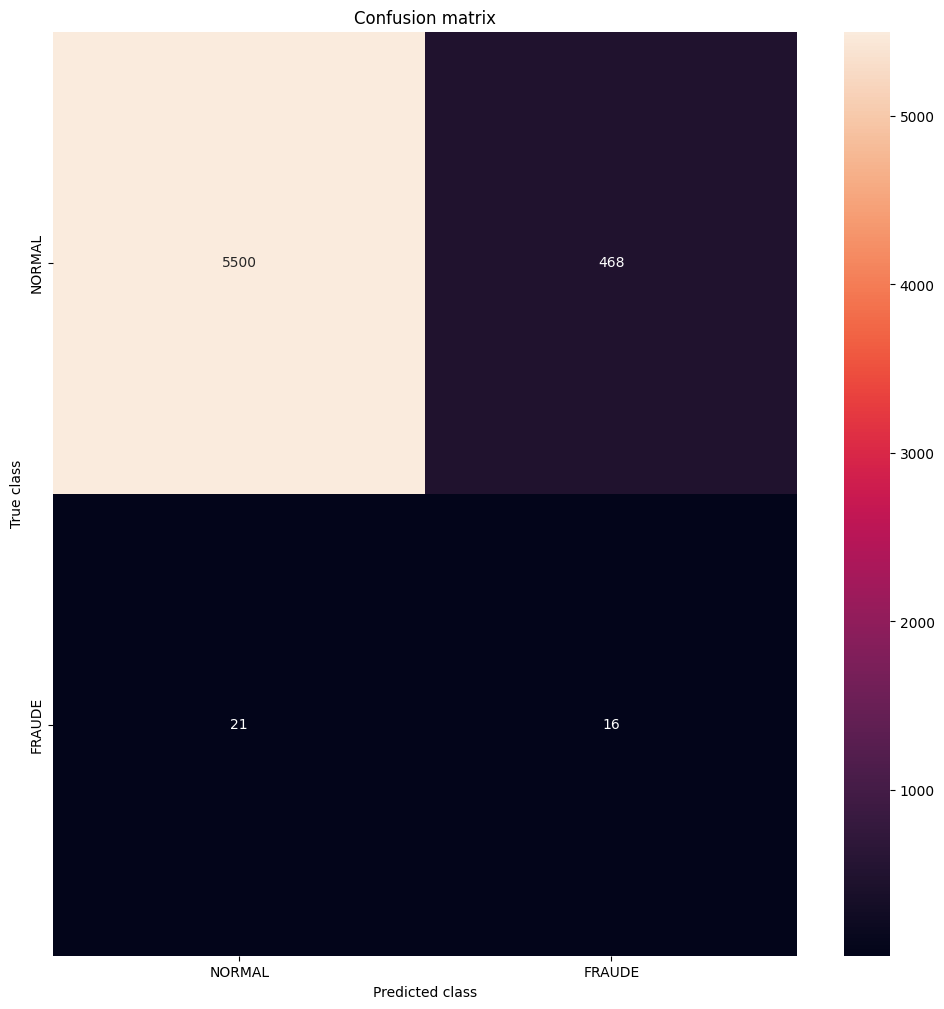

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5968
           1       0.03      0.43      0.06        37

    accuracy                           0.92      6005
   macro avg       0.51      0.68      0.51      6005
weighted avg       0.99      0.92      0.95      6005



In [ ]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Estrategia: Subsampling en la clase mayoritaria

Distribution before resampling Counter({0: 13917, 1: 92})
Distribution after resampling Counter({0: 92, 1: 92})


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


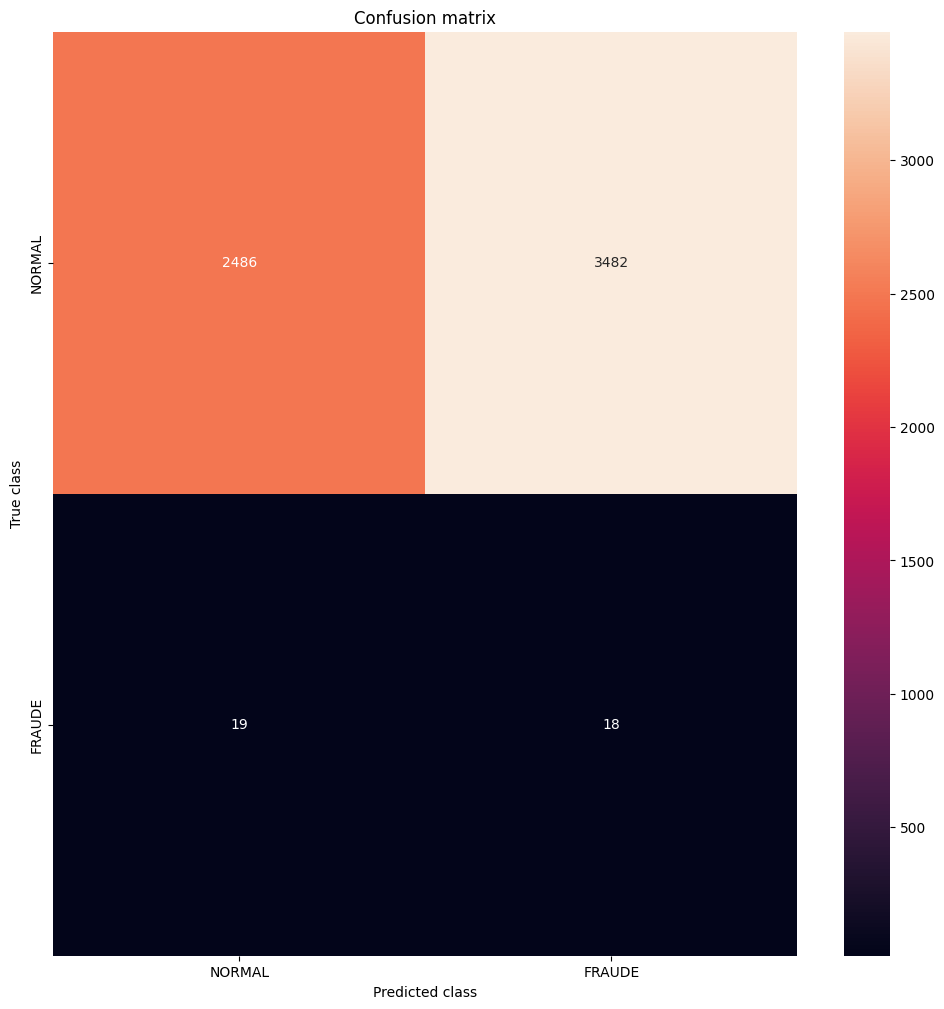

              precision    recall  f1-score   support

           0       0.99      0.42      0.59      5968
           1       0.01      0.49      0.01        37

    accuracy                           0.42      6005
   macro avg       0.50      0.45      0.30      6005
weighted avg       0.99      0.42      0.58      6005



In [ ]:
us = NearMiss(n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Estrategia: Oversampling de la clase minoritaria

Distribution before resampling Counter({0: 13917, 1: 92})
Distribution labels after resampling Counter({0: 13917, 1: 13917})


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


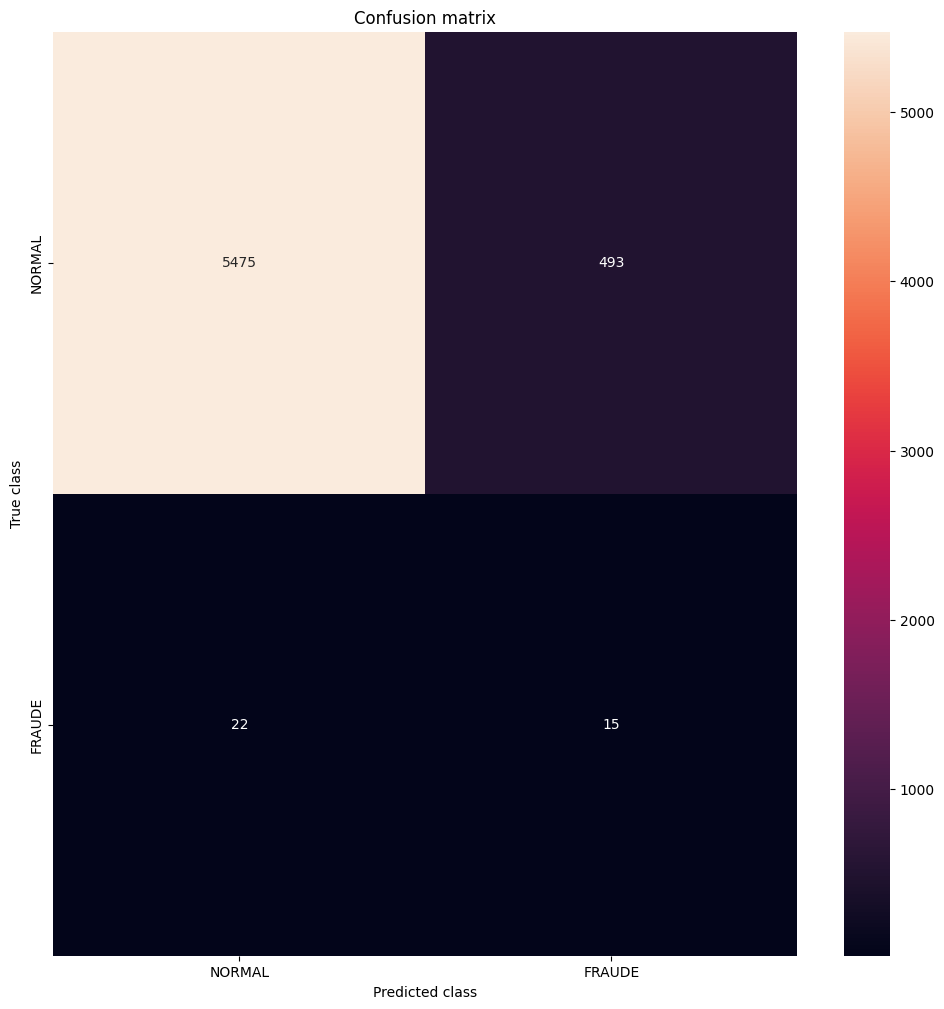

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5968
           1       0.03      0.41      0.06        37

    accuracy                           0.91      6005
   macro avg       0.51      0.66      0.51      6005
weighted avg       0.99      0.91      0.95      6005



In [ ]:
os =  RandomOverSampler(sampling_strategy='minority', random_state=None, shrinkage=None)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Estrategia: Combinamos resampling con Smote-Tomek

Distribution before resampling Counter({0: 13917, 1: 92})
Distribution after resampling Counter({0: 13917, 1: 13917})


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


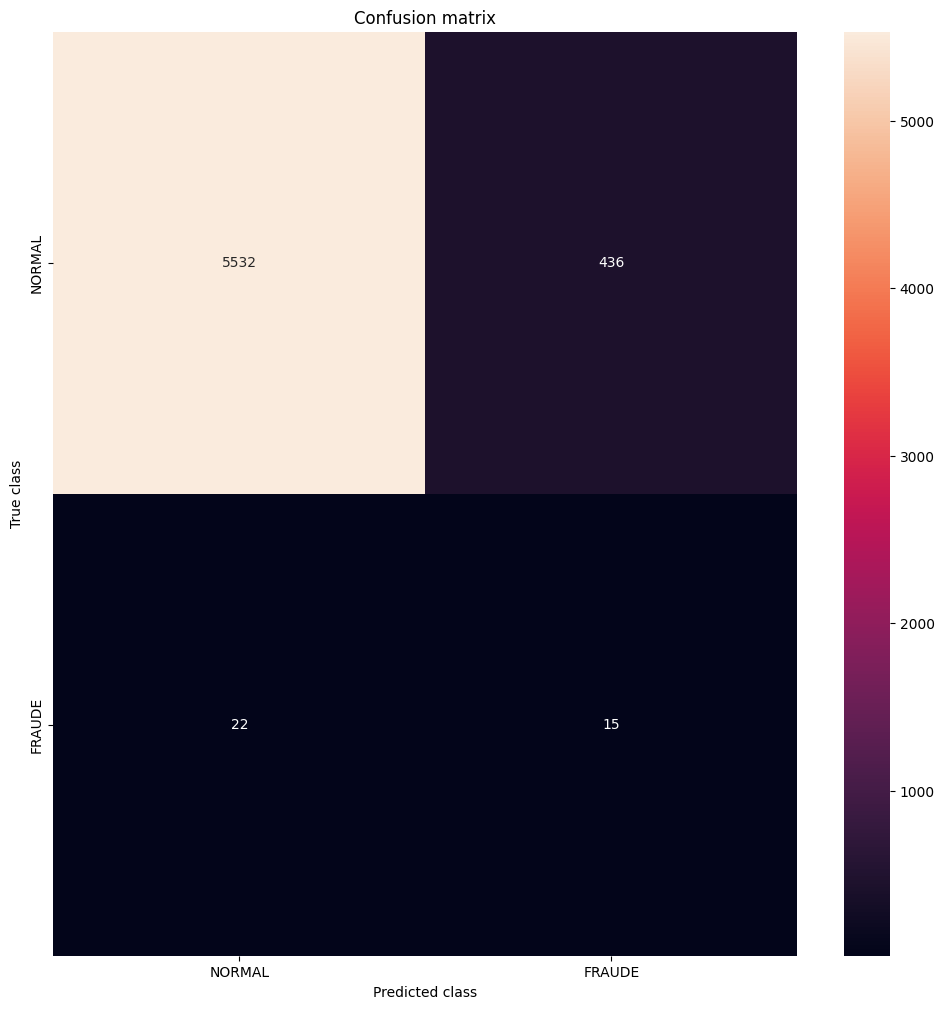

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      5968
           1       0.03      0.41      0.06        37

    accuracy                           0.92      6005
   macro avg       0.51      0.67      0.51      6005
weighted avg       0.99      0.92      0.95      6005



In [ ]:
from imblearn.under_sampling import TomekLinks

os_us = SMOTETomek(sampling_strategy='minority', random_state=None, smote=None, tomek=TomekLinks(sampling_strategy='majority'))
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Estrategia: Ensamble de Modelos con Balanceo

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


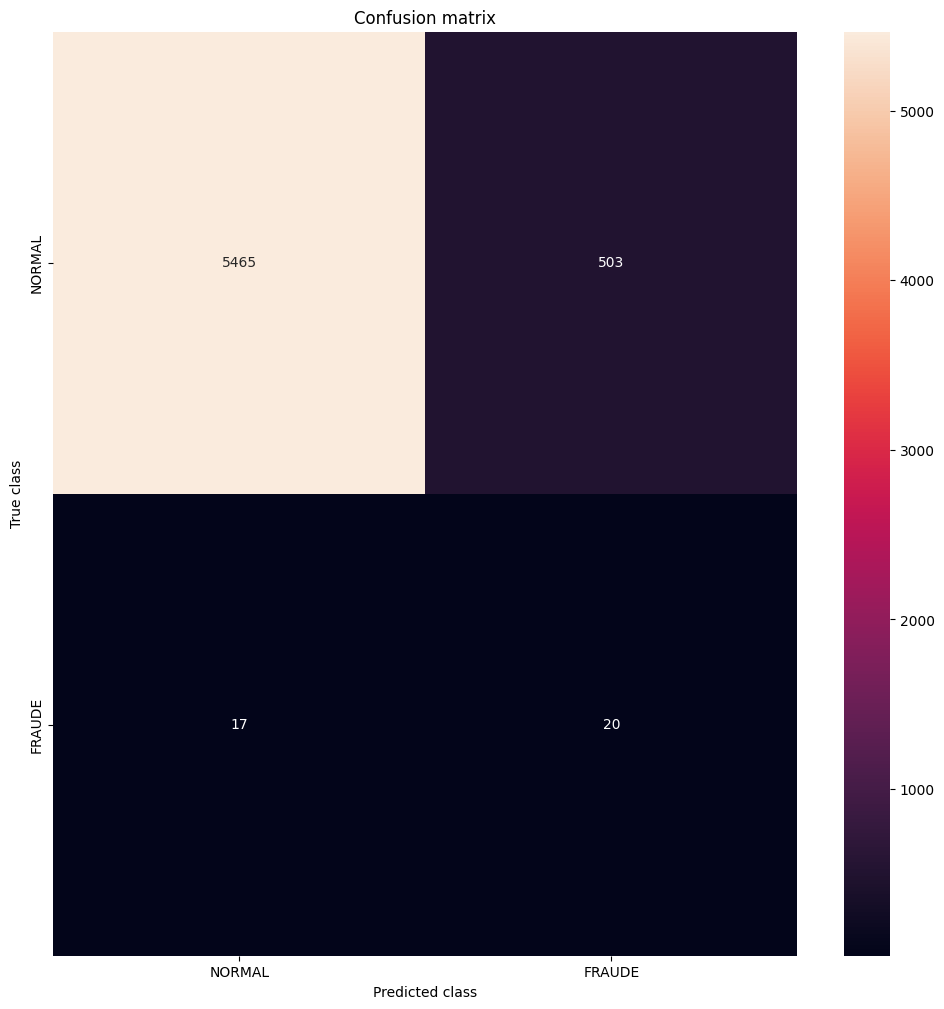

              precision    recall  f1-score   support

           0       1.00      0.92      0.95      5968
           1       0.04      0.54      0.07        37

    accuracy                           0.91      6005
   macro avg       0.52      0.73      0.51      6005
weighted avg       0.99      0.91      0.95      6005



In [ ]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)